In [ ]:
# Price prediction of NIFTY using 3 SVM models

In [ ]:
!pip install yfinance

In [ ]:
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [5]:
# load the data
from google.colab import files
files.upload()

Saving nifty.csv to nifty.csv


{'nifty.csv': b'Date,Open,High,Low,Close,Volume\r\n2020-10-15,12023.45,12025.45,11661.3,11680.35,608900\r\n2020-10-16,11727.4,11789.75,11667.85,11762.45,555800\r\n2020-10-19,11879.2,11898.25,11820.4,11873.05,541400\r\n2020-10-20,11861.0,11949.25,11837.25,11896.8,453600\r\n2020-10-21,11958.55,12018.65,11775.75,11937.65,623700\r\n2020-10-22,11890.0,11939.55,11823.45,11896.45,544900\r\n2020-10-23,11957.9,11974.55,11908.75,11930.35,502300\r\n2020-10-26,11937.4,11942.85,11711.7,11767.75,519800\r\n2020-10-27,11807.1,11899.05,11723.0,11889.4,616300\r\n2020-10-28,11922.6,11929.4,11684.85,11729.6,704000\r\n2020-10-29,11633.3,11744.15,11606.45,11670.8,555000\r\n2020-10-30,11678.45,11748.95,11535.45,11642.4,553700\r\n2020-11-02,11697.35,11725.65,11557.4,11669.15,568400\r\n2020-11-03,11734.45,11836.2,11723.3,11813.5,674300\r\n2020-11-04,11783.35,11929.65,11756.4,11908.5,667300\r\n2020-11-05,12062.4,12131.1,12027.6,12120.3,632500\r\n2020-11-06,12156.65,12280.4,12131.85,12263.55,576800\r\n2020-11-09

In [ ]:
#df.to_csv('nifty.csv')

In [6]:
# store the data
df = pd.read_csv('nifty.csv')
df

,Date,Open,High,Low,Close,Volume
0,2020-10-15,12023.45,12025.45,11661.30,11680.35,608900
1,2020-10-16,11727.40,11789.75,11667.85,11762.45,555800
2,2020-10-19,11879.20,11898.25,11820.40,11873.05,541400
3,2020-10-20,11861.00,11949.25,11837.25,11896.80,453600
4,2020-10-21,11958.55,12018.65,11775.75,11937.65,623700
...,...,...,...,...,...,...
57,2021-01-08,14258.40,14367.30,14221.65,14347.25,613500
58,2021-01-11,14474.05,14498.20,14383.10,14484.75,672900
59,2021-01-12,14473.80,14590.65,14432.85,14563.45,929600
60,2021-01-13,14639.80,14653.35,14435.70,14564.85,874000


In [ ]:
#df = pd.DataFrame(yf.Ticker("^NSEI").history(period='3mo'))

In [ ]:
# df = df.drop(['Dividends', 'Stock Splits'], axis = 1) 

In [7]:
# Show and store the last row of data
actual_price = df.tail(1)
actual_price

,Date,Open,High,Low,Close,Volume
61,2021-01-14,14550.05,14617.8,14471.5,14595.6,620200


In [8]:
# Get all of the data except the last row
df = df.head(len(df) - 1)
df

,Date,Open,High,Low,Close,Volume
0,2020-10-15,12023.45,12025.45,11661.30,11680.35,608900
1,2020-10-16,11727.40,11789.75,11667.85,11762.45,555800
2,2020-10-19,11879.20,11898.25,11820.40,11873.05,541400
3,2020-10-20,11861.00,11949.25,11837.25,11896.80,453600
4,2020-10-21,11958.55,12018.65,11775.75,11937.65,623700
...,...,...,...,...,...,...
56,2021-01-07,14253.75,14256.25,14123.10,14137.35,559200
57,2021-01-08,14258.40,14367.30,14221.65,14347.25,613500
58,2021-01-11,14474.05,14498.20,14383.10,14484.75,672900
59,2021-01-12,14473.80,14590.65,14432.85,14563.45,929600


In [9]:
# create empty lists
days = list()
adj_close_prices = list()

In [10]:
# get all the date and adjusted close prices
df_days = df.loc[:, 'Date']
df_adj_close = df.loc[:, 'Close']

In [12]:
# create the independent data set (dates)
for day in df_days:
    days.append([int(day.split('-')[2])])

# create the dependent data set (adj close prices)
for adj_close_price in df_adj_close:
    adj_close_prices.append(float(adj_close_price))

In [13]:
# show days
days

[[15],
 [16],
 [19],
 [20],
 [21],
 [22],
 [23],
 [26],
 [27],
 [28],
 [29],
 [30],
 [2],
 [3],
 [4],
 [5],
 [6],
 [9],
 [10],
 [11],
 [12],
 [13],
 [17],
 [18],
 [19],
 [20],
 [23],
 [24],
 [25],
 [26],
 [27],
 [1],
 [2],
 [3],
 [4],
 [7],
 [8],
 [9],
 [10],
 [11],
 [14],
 [15],
 [16],
 [17],
 [18],
 [21],
 [22],
 [23],
 [24],
 [28],
 [29],
 [30],
 [31],
 [4],
 [5],
 [6],
 [7],
 [8],
 [11],
 [12],
 [13]]

In [14]:
# adj close prices
adj_close_prices

[11680.35,
 11762.45,
 11873.05,
 11896.8,
 11937.65,
 11896.45,
 11930.35,
 11767.75,
 11889.4,
 11729.6,
 11670.8,
 11642.4,
 11669.15,
 11813.5,
 11908.5,
 12120.3,
 12263.55,
 12461.05,
 12631.1,
 12749.15,
 12690.8,
 12719.95,
 12874.2,
 12938.25,
 12771.7,
 12859.05,
 12926.45,
 13055.15,
 12858.4,
 12987.0,
 12968.95,
 13109.05,
 13113.75,
 13133.9,
 13258.55,
 13355.75,
 13392.95,
 13529.1,
 13478.3,
 13513.85,
 13558.15,
 13567.85,
 13682.7,
 13740.7,
 13760.55,
 13328.4,
 13466.3,
 13601.1,
 13749.25,
 13873.2,
 13932.6,
 13981.95,
 13981.75,
 14132.9,
 14199.5,
 14146.25,
 14137.35,
 14347.25,
 14484.75,
 14563.45,
 14564.85]

In [18]:
# create 3 models

lin_svr = SVR(kernel='linear', C=1000.0)
lin_svr.fit(days, adj_close_prices)


poly_svr = SVR(kernel='poly', C=1000.0, degree=2)
poly_svr.fit(days, adj_close_prices)


rbf_svr = SVR(kernel='rbf', C=1000.0, gamma=0.85)
rbf_svr.fit(days, adj_close_prices)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.85,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

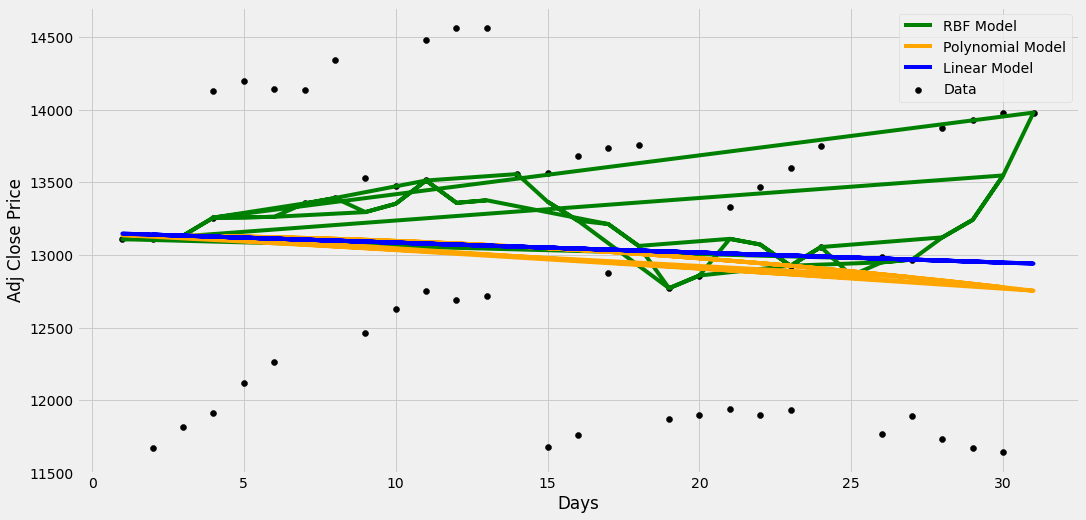

In [27]:
# plot the models
plt.figure(figsize=(16,8))
plt.scatter(days, adj_close_prices, color = 'black', label = 'Data')

plt.plot(days, rbf_svr.predict(days), color = 'green', label = 'RBF Model')
plt.plot(days, poly_svr.predict(days), color = 'orange', label = 'Polynomial Model')
plt.plot(days, lin_svr.predict(days), color = 'blue', label = 'Linear Model')

plt.xlabel('Days')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

In [25]:
# show the predicted price for the given day
day = [[60]]
print('The RBF SVR predicted price:', rbf_svr.predict(day))
print('The Poly SVR predicted price:', poly_svr.predict(day))
print('The Linear SVR predicted price:', lin_svr.predict(day))

The RBF SVR predicted price: [13225.64781003]
The Poly SVR predicted price: [11701.38616124]
The Linear SVR predicted price: [12742.04375]


In [26]:
# show the actual price
print('Actual Price:', actual_price['Close'][61])

Actual Price: 14595.6
